## **<center>A Cost-Benefit Analysis of Solar Panel Battery Installation for Household Electricity Usage**

### <center>Project Author
<center>Jacktone Etemesi

### <center>Contact Information
 <center>Email: jacktoneetemesi1@gmail.com
 <center>Phone: +254708578181

### **Introduction**

The ever-increasing demand for sustainable and cost-effective energy solutions has prompted homeowners to explore innovative strategies to manage their electricity consumption. This project aims to address this need by conducting a comprehensive analysis of the potential benefits and feasibility of implementing solar panel battery installation for household electricity usage optimization.

As the global focus on climate change intensifies, individuals are seeking ways to reduce their carbon footprint while also enhancing their financial well-being. By leveraging solar energy and storage technology, homeowners have the opportunity to harness renewable power sources and mitigate their reliance on conventional electricity providers. This project delves into the intricate interplay between solar electricity generation, battery storage, and the dynamic electricity market to quantify potential cost savings and assess the viability of implementing such a solution.

The analysis will encompass an evaluation of Naomi's solar electricity generation and electricity usage data, examining hourly increments throughout the year 2020. By conducting a thorough cost-benefit analysis, we aim to empower homeowners with valuable insights into the financial implications of integrating battery storage systems, thereby enabling informed decisions that align with both sustainability and economic objectives. 

### **Dataset Explanation**

The provided dataset contains information related to electricity generation and usage in a household. It consists of four variables, each serving a distinct purpose:

1. **Hour**: This variable indicates the specific hour of the day during which the data entry was recorded. It represents a temporal aspect and allows us to analyze electricity generation and usage patterns at different times.

2. **Date/hour start**: This variable represents the starting date and hour of the data entry. It provides the timestamp for when the observations were recorded. The combination of date and hour enables us to track the chronological sequence of the data points.

3. **Solar electricity generation (kWh)**: This variable quantifies the amount of electricity generated by the solar panels installed on the household's roof. The measurement unit is kilowatt-hours (kWh), indicating the energy output from the solar panels.

4. **Electricity usage (kWh)**: This variable records the amount of electricity consumed by the household during the specified hour. Similar to solar electricity generation, it is measured in kilowatt-hours (kWh) and indicates the energy usage by the household's electrical appliances and systems.


### **Assumptions of the Study**

1. **Stable Consumption Trend**: The analysis assumes that the household's electricity consumption trend observed in the provided data will remain relatively constant over the projected 20-year period. This implies that the consumption patterns and influencing factors will persist without significant fluctuations.

2. **Battery Efficiency and Performance**: It is assumed that the battery's efficiency and performance will remain consistent throughout its expected working lifetime of 20 years. The battery's ability to store and discharge energy is considered to be unaffected by degradation or advancements in battery technology.


## <center> **Step 1: Data Import and Library Setup for Data Manipulation and Visualization**


### **1a. Data Manipulation and Visualization Libraries**

In this section, we'll import essential libraries for effective data manipulation and visualization:

- **numpy**: This library is crucial for efficient numerical computations and operations.

- **pandas**: Used for data analysis and manipulation, pandas simplifies working with structured data.

- **Seaborn**: A statistical data visualization library, Seaborn creates informative and visually appealing visualizations.

- **Matplotlib**: This foundational library generates a wide range of static, interactive, and animated visualizations in Python.

- **plotly**: An interactive visualization library, plotly facilitates the creation of dynamic and interactive visualizations.

- **Cufflinks**: This library, working with plotly and pandas, offers a streamlined approach to creating interactive visualizations.


In [49]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

# Initialize notebook mode for Plotly
init_notebook_mode(connected=True)
cf.go_offline()

# Make matplotlib plots display inline
%matplotlib inline


### **1b. Loading the Dataset into a Pandas DataFrame**

Now that we have successfully imported all the relevant libraries, we can proceed to load the dataset into a pandas dataFrame for modeling. We will achieve this in two steps:

- **Step 1**: Load the "Data for candidate.xlsx" Excel file into a pandas ExcelFile object.

- **Step 2**: Generate a DataFrame containing our data from the ExcelFile object.


In [50]:
# Step 1
data=pd.ExcelFile("Data for candidate.xlsx")
data.sheet_names # returns a list of sheet names in our pandas ExcelFile object.

['Raw Data']

In [51]:
# Step 2
df=pd.read_excel(data,'Raw Data',header=[2])
df.head() # Lists the first 5 observations 

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


## <center> **Step 2: Data Cleaning**
### **2a. Data Quality Inspection**

With our dataset loaded into a pandas DataFrame, our next step is to inspect it for potential quality issues. We will examine our data to identify the following quality issues:

- **Missing Values**: We will identify and address any missing values within the dataset.
  
- **Duplicate Values**: Detection and management of duplicate records within the dataset will be performed.
  
- **Outlier Observations**: We will look for and handle any outlier observations that might affect the integrity of our analysis.

- **Relevance**: As our analysis should pertain only to observations from the year 2020, we will ensure that the dataset contains relevant data for that specific year.


#### **i. Inspecting for Missing Values**

To identify and assess missing values within the dataset, we will employ the pandas `isnull()` function. This function allows us to effectively determine the presence of missing data. Our approach will be as follows:


In [52]:
df.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

From the displayed output, it's evident that every entry in our dataset contains values. However, it's worth noting that the documentation highlights the absence of data for February 29th. As per the documentation guidance, this date is omitted. It's essential to consider that while we're neglecting this missing data point based on guidance, an alternative approach could involve leveraging time series techniques to forecast and populate missing values, if deemed necessary.

We can use a heatmap to show the completeness of our data as shown below. 

Text(0.5, 1.0, 'Sum of Missing Values')

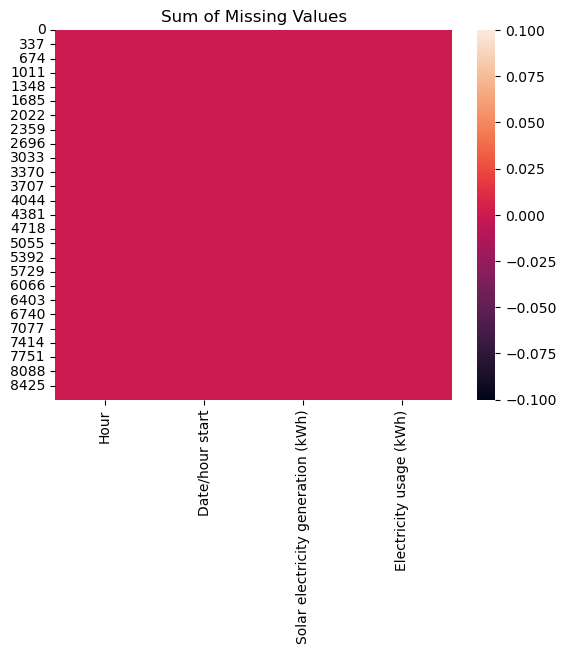

In [53]:
sns.heatmap(df.isnull()).set_title('Sum of Missing Values')

#### **ii. Inspecting for Duplicate Entries**
Our next step is to examine the dataset for duplicate entries. By utilizing the pandas `.duplicated()` function, we can effectively identify duplicated records. The approach will be as follows:


In [54]:
df.duplicated().sum()

0

Our assessment reveals that there are no duplicated entries within our dataset, as indicated by the output above.


#### **iii. Inspecting for Outliers**

Outliers are observations that are far off from others. There are various outlier detection and treatment techniques and for this case, we will use a box plot to visualize our data for outliers before treating them as shown below;

#### Cleaning for outliers in the Solar electricity generation (kWh) column

Text(0.5, 1.0, 'Solar electricity generation')

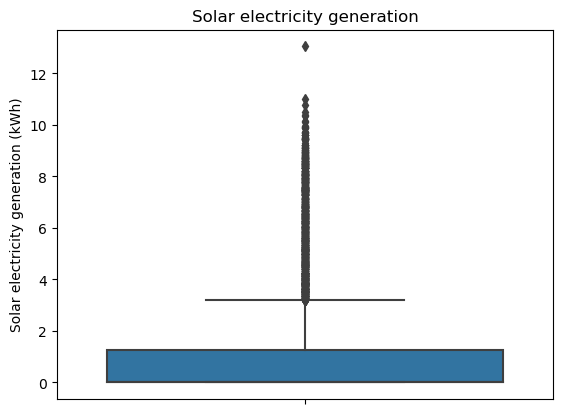

In [55]:
# boxplot for Solar electricity generation (kWh)
sns.boxplot(data=df,y='Solar electricity generation (kWh)').set_title("Solar electricity generation")

From the presented box plot, it's evident that an outlier exists within our dataset, specifically characterized by a Solar electricity generation (kWh) value exceeding 12. To gain deeper insights into this observation, we will conduct further analysis on our dataset.

Our next step involves obtaining statistical summary of the column and filtering the dataset to exclusively retrieve observations possessing Solar electricity generation (kWh) values surpassing 12. This will allow us to scrutinize this


In [56]:
df['Solar electricity generation (kWh)'].describe()

count    8760.000000
mean        1.116750
std         2.026098
min         0.000000
25%         0.000000
50%         0.024000
75%         1.272750
max        13.050000
Name: Solar electricity generation (kWh), dtype: float64

From the provided statistics summary, we extract valuable insights into the distribution of `Solar electricity generation (kWh)` values within the dataset. The `df.describe()` function serves as a powerful tool in data analysis, offering essential statistics for a given dataset column. These key statistics include:

- **count**: Total observations: 8760. Indicates data completeness for the variable.

- **mean**: Mean: 1.116750 kWh. Offers the central tendency of the data.

- **std**: Standard deviation: 2.026098 kWh. Measures data spread from the mean.

- **min**: Minimum: 0 kWh. Shows the lowest recorded value.

- **25% (Q1)**: First quartile: 0 kWh. Represents the bottom 25% of the data.

- **50% (median)**: Median: 0.024000 kWh. Divides data into two halves.

- **75% (Q3)**: Third quartile: 1.272750 kWh. Encompasses 75% of the data.

- **max**: Maximum: 13.050000 kWh. Indicates the highest observed value.

With these insights, we proceed to filter the DataFrame to extract entries with `Solar electricity generation (kWh)` values exceeding 12 kWh. This step is depicted below:

In [57]:
df.query('`Solar electricity generation (kWh)` >12')

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2569,1,2020-04-18 01:00:00,13.05,0.315968


We've identified a single entry within our dataset with a Solar electricity generation (kWh) value exceeding 12, specifically measuring 13.05 kWh. To further assess the status of this observation as an outlier, we will employ a technique known as the Interquartile Range (IQR) outlier treatment.

**How IQR Outlier Treatment Works:**

The Interquartile Range (IQR) is a statistical measure used to define the spread or dispersion of a dataset. In the context of outlier treatment, the IQR serves as a vital tool to identify potential outliers by focusing on the distribution of the data. Here's how the process works:

1. **Calculate the IQR:** The IQR is computed by finding the difference between the third quartile (Q3) and the first quartile (Q1), denoted as IQR = Q3 - Q1.

2. **Determine Outlier Thresholds:** Outliers are identified by considering values that fall beyond a certain range beyond the quartiles. This range is calculated by adding a multiple of the IQR to Q3 (upper threshold) and subtracting the same multiple of the IQR from Q1 (lower threshold).

3. **Identify Outliers:** Any data point that lies beyond the calculated thresholds is considered a potential outlier.

4. **Treatment or Decision:** Depending on the context, you might decide to remove, transform, or handle the outliers in a way that best suits the analysis.

By employing the IQR outlier treatment technique, we can systematically determine if the observation with a Solar electricity generation (kWh) value of 13.05 is indeed an outlier that warrants further action, or if it can be reasonably retained within our analysis.

In [58]:
# Calculate the IQR for the column
Q1 = df['Solar electricity generation (kWh)'].quantile(0.25)
Q3 = df['Solar electricity generation (kWh)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
outliers_gen=df[(df['Solar electricity generation (kWh)'] < lower_bound) | (df['Solar electricity generation (kWh)'] >= upper_bound)].index
df.drop(index=outliers_gen,axis=0,inplace=True)

Having successfully removed the outliers from this column, our next step involves plotting the data and obtaining a statistical summary of the variable to ascertain if any notable changes have occurred.

Text(0.5, 1.0, 'Cleaned Solar electricity generation')

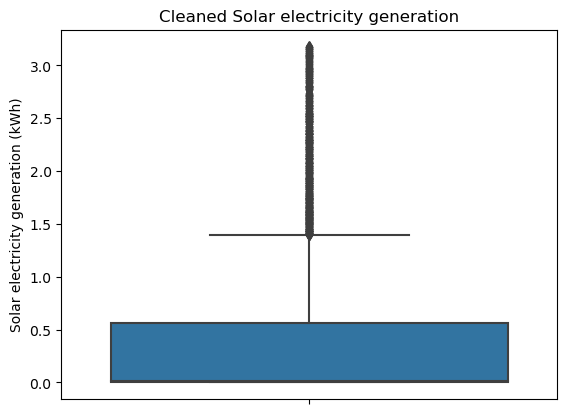

In [59]:
sns.boxplot(data=df,y='Solar electricity generation (kWh)').set_title("Cleaned Solar electricity generation")

In [60]:
df['Solar electricity generation (kWh)'].describe()

count    7636.000000
mean        0.430112
std         0.742138
min         0.000000
25%         0.000000
50%         0.015000
75%         0.558750
max         3.180000
Name: Solar electricity generation (kWh), dtype: float64

By examining the presented box plot, it's evident that the outlier observation has been successfully removed from our dataframe. With this accomplished, we are now ready to proceed with the process of addressing outliers in the Electricity usage (kWh) column. The approach for this task will follow the same steps as outlined above.


#### Cleaning for outliers in the Electricity usage (kWh) column

We will follow the steps outlined above to inspect and clean outliers from the Electricity usage (kWh) column as done below

Text(0.5, 1.0, 'Electricity usage')

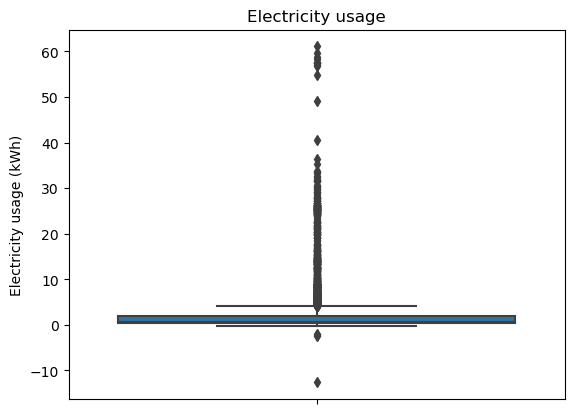

In [61]:
# boxplot for Electricity usage (kWh)
sns.boxplot(data=df,y='Electricity usage (kWh)').set_title("Electricity usage")

In [62]:
# Checking statistical summary of the column 
df['Electricity usage (kWh)'].describe()

count    7636.000000
mean        2.189697
std         4.749266
min       -12.624000
25%         0.330000
50%         0.708000
75%         1.845000
max        61.102800
Name: Electricity usage (kWh), dtype: float64

In [63]:
# Calculate the IQR for the column
Q1 = df['Electricity usage (kWh)'].quantile(0.25)
Q3 = df['Electricity usage (kWh)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame based on the Electricity usage (kWh) column 

outliers_usage=df[(df['Electricity usage (kWh)'] < lower_bound) | (df['Electricity usage (kWh)'] >= upper_bound)].index
df.drop(index=outliers_usage,axis=0,inplace=True)

Text(0.5, 1.0, 'Cleaned Electricity usage')

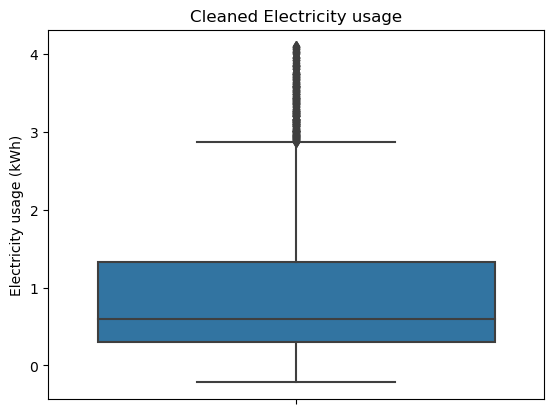

In [64]:
#plotting to confirm outliers have been removed
sns.boxplot(data=df,y='Electricity usage (kWh)').set_title("Cleaned Electricity usage")

In [65]:
# Checking statistical summary of the cleaned column 
df['Electricity usage (kWh)'].describe()

count    6782.000000
mean        0.957418
std         0.883042
min        -0.217500
25%         0.306000
50%         0.594000
75%         1.332000
max         4.098600
Name: Electricity usage (kWh), dtype: float64

#### **iv. Inspecting our Data for Relevance**

In order to ensure the accuracy and relevance of our analysis, we will examine the dataset to determine if the observations fall within the specified time frame of January 1st, 2020 at 00:00:00 to December 31st, 2020 at 23:00:00.

To assess the presence of observations outside this defined range, we will leverage the pandas `max()` and `min()` functions applied to the 'Date/hour start' column.


In [66]:
#Finding the first date of observation 
df['Date/hour start'].min()

Timestamp('2020-01-01 00:00:00')

In [67]:
# Finding the last date of observations 
df['Date/hour start'].max()

Timestamp('2020-12-31 23:00:00')

Based on the displayed outputs, a conclusive observation can be drawn: all entries within our DataFrame are considered relevant as they adhere to the predetermined timeframe from January 1st, 2020 at 00:00:00 to December 31st, 2020 at 23:00:00.

## <center> **Step 3: Exploratory Data Analysis & Visualization**


In this section, we will embark on the exploration and visualization of our data's distribution across variables, as well as any potential relationships existing between them.

For our univariate analysis, we will employ histograms to effectively showcase the distribution of individual variables. This visualization aids in understanding the spread and central tendencies of the data.

When it comes to multivariate analysis, our chosen tool is the scatter plot. This visualization type allows us to discern correlations and patterns between two variables. The arrangement of data points on the scatter plot can provide insights into potential relationships.


#### **Plot 1. Histogram Showing the distribution of Electricity usage (kWh) in 2020**

Text(0.5, 1.0, 'Distribution of Electricity Usage')

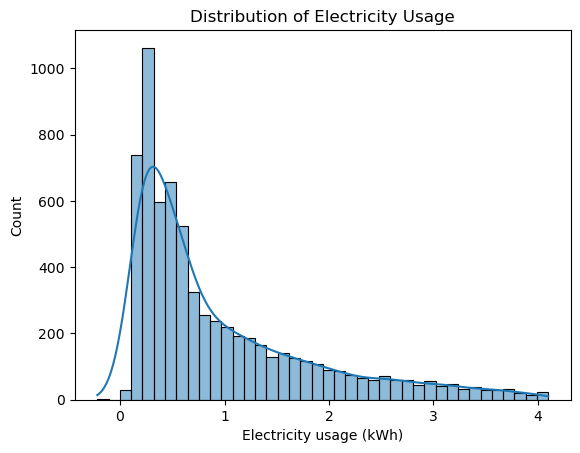

In [68]:

sns.histplot(df['Electricity usage (kWh)'],kde=True).set_title("Distribution of Electricity Usage")

From the histogram displayed above we observe that the distribution exhibits characteristics of a normal distribution while also displaying a right skew.

**Normal Distribution**: A normal distribution, also known as a Gaussian distribution, is a bell-shaped distribution that is symmetric around the mean. In the histogram, we can see that the data is roughly bell-shaped, suggesting that most observations are clustered around the mean value.

**Right Skew (Positive Skew)**: The right skew indicates that the tail of the distribution extends further to the right side. In this context, it implies that there are a few instances of unusually high electricity usage that pull the right tail of the distribution in that direction. The majority of the data points are concentrated on the left side of the histogram, closer to the mean.

This combination of normal distribution and right skew suggests that while the majority of electricity usage values are within a reasonable range, there are some instances of significantly higher electricity usage that contribute to the elongation of the right tail.


#### **Plot 2. Histogram Showing the Distribution of Solar Electricity Generation (kWh) in 2020**

To comprehend the distribution of Solar electricity generation (kWh) throughout the year 2020, we will employ a histogram, similar to the approach taken for Electricity usage (kWh) above. This visualization will help us discern the frequency of different ranges of solar electricity generation values.

Text(0.5, 1.0, 'Distribution of Solar electricity generation')

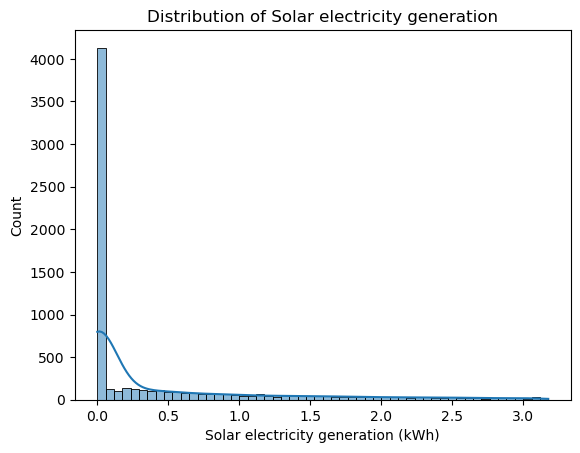

In [69]:
sns.histplot(df['Solar electricity generation (kWh)'],kde=True).set_title("Distribution of Solar electricity generation")

Similar to the Electricity usage (kWh) distribution, the Solar Electricity Generation (kWh) also adheres to a normal distribution with a prolonged right tail. This histogram portrayal showcases a prominent peak in the frequency of hours that recorded 0 Solar Electricity Generation (kWh), suggesting a concentrated cluster of observations around that particular value.

The distribution's resemblance to a normal distribution highlights the presence of a central tendency, while the extended right tail signifies the existence of occasional instances with notably higher solar electricity generation. This distribution pattern reflects the interplay of consistent generation levels and occasional surges in solar electricity production.

#### **Plot 3. Scatter Plot for Solar Electricity Generation (kWh) and Electricity Usage (kWh)**

Scatter plots are invaluable tools for unveiling relationships between variables. In this context, we will leverage Seaborn to create a scatter plot for Solar Electricity Generation (kWh) and Electricity Usage (kWh). This visual representation will enable us to discern any potential relationship or patterns between these two variables.

Let's proceed to generate the scatter plot using Seaborn:


Text(0.5, 1.0, 'Solar electricity generation vs Electricity usage')

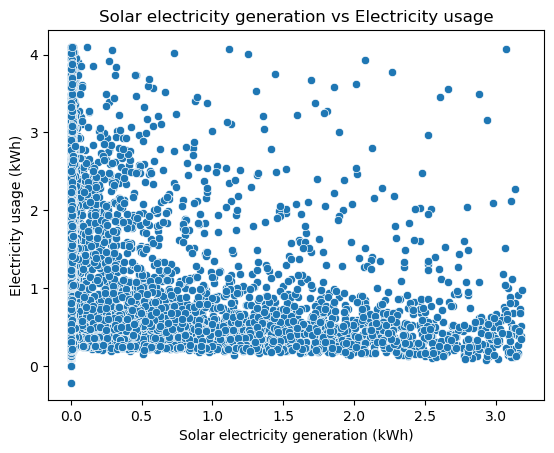

In [70]:
sns.scatterplot(x=df['Solar electricity generation (kWh)'],y=df['Electricity usage (kWh)']).set_title("Solar electricity generation vs Electricity usage")

From the presented scatter plot, it becomes evident that there is no substantial correlation between Solar electricity generation and Electricity usage. To delve deeper into this observation and gain a more comprehensive understanding, we will proceed with two additional steps:

**Step 1:** Generate a correlation matrix to quantitatively assess the relationship between Solar electricity generation and Electricity usage.

**Step 2:** Plot a heatmap to visually represent the correlation matrix, providing a clearer and more interpretable depiction of the relationship between the two variables.


In [71]:
# Step 1 : generating correlation matrix
corr_matrix=df[['Solar electricity generation (kWh)','Electricity usage (kWh)']].corr(numeric_only=True)
corr_matrix

,Solar electricity generation (kWh),Electricity usage (kWh)
Solar electricity generation (kWh),1.000000,-0.159878
Electricity usage (kWh),-0.159878,1.000000


Text(0.5, 1.0, 'Solar Electricity Generated vs Usage Correlation')

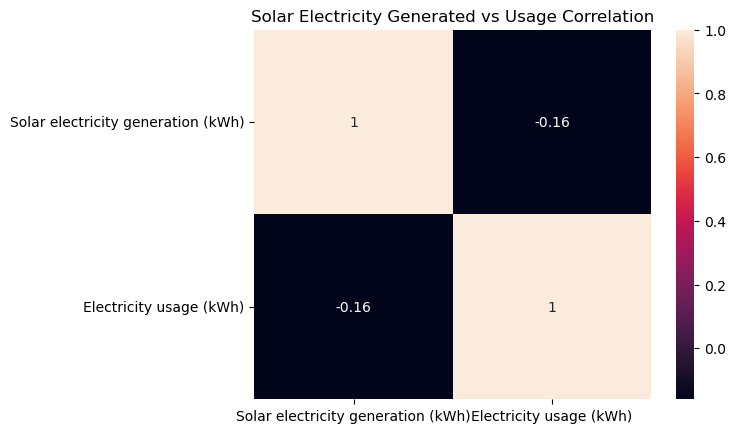

In [72]:
#Step 2 : plotting heatmap
sns.heatmap(corr_matrix,annot=True).set_title("Solar Electricity Generated vs Usage Correlation")

The heatmap visualization presented above solidifies our conclusion that there exists a very weak correlation between the two variables, Solar electricity generation and Electricity usage. The correlation coefficient of approximately -0.16 underscores the lack of a significant linear relationship between these variables.


## <center> **Step 4: Data Modelling**

In this section, we will address the research questions that have been provided. The structure of this section will follow the following format:

- Research Question
  - Approach and Visualization (if applicable)
  - Explanation


### **1. Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).**


To address this specific research question, we will quantify the deficit between the electricity consumed in a given hour and the electricity generated within that same timeframe. This calculation is achieved by subtracting the Solar electricity generation (kWh) from the Electricity usage (kWh) value for each corresponding hour. The results of these calculations will be recorded in a newly created column named 'Purchased without battery(kWh)'.

When interpreting the values in this column:
- Positive values indicate an actual deficit, meaning more electricity was consumed than generated, and these values will be recorded as they are.
- Negative values that emerge from cases where more electricity was generated than consumed are recorded as 0. This is because in scenarios of surplus electricity generation, there is no requirement to purchase additional units.

This procedure is executed through the following steps:

1. Iterate through the values of Solar electricity generation (kWh) and 'Electricity usage (kWh)', comparing the corresponding values for each hour.

2. If the electricity usage is greater than the production (generation), calculate the difference between usage and generation. This value represents the units that were purchased due to an electricity deficit.

3. If the electricity generation exceeds or matches the usage (surplus scenario), set the purchased units value to 0, as no additional units were required.

4. Append each calculated purchased value to an initially empty list.

5. Utilize the populated list to create a new column named 'Purchased without battery(kWh)' in the DataFrame, which will hold the calculated purchased units for each hour.

These steps are implemented as follows;


In [73]:
# Calculating purchased units 
purchased_units=[]
for a, b in zip(df['Solar electricity generation (kWh)'],df['Electricity usage (kWh)']):
    if b>a:
        deficit=b-a
    else:
        deficit=0
    purchased_units.append(deficit)
df['Purchased without battery(kWh)']=purchased_units
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Purchased without battery(kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000


### **2. Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).**


We will use the following process to calculate the surplus the excess electricity generated in comparison to electricity:

1. Iterate through the values of Solar electricity generation (kWh) and Electricity usage (kWh), comparing the respective entries for each hour.

2. For instances where the solar electricity generation surpasses the electricity usage, compute the excess electricity generated. This is done by subtracting the electricity usage from the generated electricity, capturing the surplus energy.

3. For cases where the generated electricity falls short of the electricity usage, set the computed value to 0. This action reflects a negative net change, signifying a deficit rather than a surplus.

4. Store the computed values for excess electricity generated in a new column designated as 'Surplus generation (kWh)' within the DataFrame as implemented below.

In [74]:
# Finding surplus  electricity generated by solar i.e instances where power generated exceeded the usage 
surplus_gen=[]
for a, b in zip(df['Solar electricity generation (kWh)'],df['Electricity usage (kWh)']):
    if a>b:
        surplus=a-b
    else:
        surplus=0
    surplus_gen.append(surplus)

df['Surplus generation (kWh)']=surplus_gen
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Purchased without battery(kWh),Surplus generation (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0


### **4. Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.**

    The battery charge level should:

    •	begin at zero at 1 January 2020 00:00.
    •	allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).
    •	be subject to the cap on the maximum battery charge level.



We will approach this question by introducing two new columns that collectively provide insights into the battery charge dynamics:

1. **Net Charge Change (kWh) Column:**
   - The 'Net charge change (kWh)' column captures the difference between Solar electricity generation (kWh) and Electricity usage (kWh), without truncating negative values to zero.
   - Essentially, this column represents the charge surplus available for storage if positive, or the deficit in electricity generation if negative.

2. **Stored Charge (kWh) Column:**
   - The 'Stored charge (kWh)' column denotes the amount of electricity available to be stored in the battery for each hour, considering the Net charge change (kWh) value for that specific hour.
   - We take these key conditions into account:
     - Minimum battery charge level is 0 (kWh), ensuring all negative values are set to 0 to prevent discharge below the minimum capacity.
     - Maximum battery charge level is 12.5 (kWh), as indicated.
   - The logic of implementing this involves iterating through the 'Surplus generation (kWh)' column and determining the Stored charge (kWh) value based on the aforementioned conditions.

With the Stored charge (kWh) column established, we can proceed to calculate the 'Cumulative battery charge level (kWh)' for each hour:

- Start by initializing the battery charge level to 0 on January 1st, 2021, at 00:00:00.
- Create an empty list to store the computed battery charge levels.
- Iterate through the 'Net charge change (kWh)' column to calculate the cumulative battery charge level for each hour.
- The charge level calculation follows the equation: `charge_levels = max(0, min(max battery capacity, battery charge level at that hour + 'Net charge change (kWh)'))`.
- Append the calculated cumulative charge levels to the list and utilize it to construct a new DataFrame as shown below


In [75]:
# step 1: creating the 'Net charge change (kWh) column 
df['Net charge change (kWh)']=df['Solar electricity generation (kWh)']-df['Electricity usage (kWh)']

# step 2: creating the Stored charge (kWh) column 
stored_charge = []
max_battery_capacity = 12.5
min_battery_capacity=0

for i in df['Surplus generation (kWh)']:
    if i < min_battery_capacity:
        charge = min_battery_capacity
    elif min_battery_capacity <= i < max_battery_capacity:
        charge = i
    else:
        charge = max_battery_capacity
    stored_charge.append(charge)

df['Stored charge (kWh)'] = stored_charge

# step 3: Computing cumulative battery charge level by factoring in charge stored at every hour lessing deficit required to be supplemented 
# Initialize battery charge level to 0 on 1st Jan 2021 at 00:00:00
battery_charge_level = 0

# List to store calculated battery charge levels
battery_charge_levels = []

# Iterate through the dataframe rows and calculate battery charge levels
for index, row in df.iterrows():
    # Calculate the battery charge level for the current hour
    battery_charge_level = max(0, min(12.5, battery_charge_level + row['Net charge change (kWh)']))
    
    # Append the calculated battery charge level to the list
    battery_charge_levels.append(battery_charge_level)

# Add the battery charge levels as a new column in the dataframe
df['Cumulative battery charge level (kWh)'] = battery_charge_levels
#df.drop(columns=['Net charge change (kWh)'],axis=1,inplace=True)

In [76]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Purchased without battery(kWh),Surplus generation (kWh),Net charge change (kWh),Stored charge (kWh),Cumulative battery charge level (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,-1.509849,0.0,0.0
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,-1.411859,0.0,0.0
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,-1.023898,0.0,0.0
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,-0.642000,0.0,0.0
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,-0.960000,0.0,0.0


### **4. Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.**

With the battery system integrated, the formula for the linear equation for calculating the deficit is as follows:

**Purchased Units = (Generated Electricity + Stored Battery Charge) - Electricity Usage**

In essence, this equation considers both the electricity generated and the stored battery charge when determining the net charge surplus or deficit. The computation involves two main scenarios:

1. When the value of (Generated Electricity + Stored Battery Charge) is less than the Electricity Usage (i.e., more electricity was consumed than generated):
   - In such cases, we will calculate the deficit as Electricity Usage - (Generated Electricity + Stored Battery Charge).
   
2. When the value of (Generated Electricity + Stored Battery Charge) is greater than or equal to the Electricity Usage (i.e., surplus electricity is generated):
   - In these instances, the deficit value will be set to 0, as negative values are not applicable in this context.

By incorporating these conditions, we can effectively determine the amount of purchased units, factoring in both generated electricity and stored battery charge.

The resulting values if electricity purchased with battery in place is recorded in a new column named Purchased with battery(kWh) as follows;

In [77]:
purchased_units=[]
def purchases_with_bat():
    for a,b in zip((df['Solar electricity generation (kWh)']+df['Cumulative battery charge level (kWh)']),df['Electricity usage (kWh)']):
        if a<b:
            deficit=b-a
        elif a>=b:
            deficit=0
        purchased_units.append(deficit)
    return purchased_units
df['Purchased with battery(kWh)']=purchases_with_bat()


In [78]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Purchased without battery(kWh),Surplus generation (kWh),Net charge change (kWh),Stored charge (kWh),Cumulative battery charge level (kWh),Purchased with battery(kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,-1.509849,0.0,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,-1.411859,0.0,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,-1.023898,0.0,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,-0.642000,0.0,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,-0.960000,0.0,0.0,0.960000


### 5. Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) from installing a battery compared to using the existing solar panels alone**

To quantify the cost savings achieved by incorporating a battery system compared to utilizing existing solar panels alone throughout 2020, we will undertake the following methodology:

1. **Cost Calculation for Solar Panels Alone:**
   - Calculate the cost of electricity consumed while solely relying on solar panels for the entire year.
   - The cost per unit of electricity (i) is given as $0.17.
   - The formula for calculating the cost would be: `Cost without battery = Electricity Purchased without battery (kWh) * Cost per unit of electricity`.

2. **Cost Calculation for Solar Panels and Battery:**
   - Similarly, compute the cost of electricity consumed when both solar panels and a battery system are utilized.
   - Utilize the same cost per unit of electricity for this calculation.
   - The formula for the cost would be: `Cost with battery = Electricity Purchased with battery (kWh) * Cost per unit of electricity`.

3. **Savings Calculation:**
   - Determine the savings achieved by subtracting the cost when using solar panels and a battery from the cost of using solar panels alone.
   - The savings can be calculated using the formula: `Savings = Cost without battery - Cost with battery`.

In [79]:
#Unit cost of electricity 
unit_cost=0.17

# Step 1: computing cost of purchasing electricity without battery
cost_without_battery=df['Purchased without battery(kWh)'].sum()*(1/unit_cost)

#step 3: computing cost with battery installed
cost_with_battery=df['Purchased with battery(kWh)'].sum()*(1/unit_cost)

#step 3: computing savings 
cost_savings=cost_without_battery-cost_with_battery
print(round(cost_savings,2))


6295.85


From the provided output, it is evident that the decision to install a battery system at the commencement of 2020 yields a substantial net cost saving of **$6,295.85.** This significant financial benefit underscores the advantageous impact of incorporating a battery in conjunction with existing solar panels, resulting in notable cost reductions over the course of the year.


### **6. Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:**

    - monthly solar generation.
    - monthly electricity usage.
    - monthly electricity purchased from the electricity provider (no battery).
    - monthly electricity purchased from the electricity provider (with battery).


##### **Plot 1: Monthly Average Solar electricity generation (kWh) in 2020**

**Steps to Create the Plot:**

**Step 1:** Create two new columns 'month' and 'year' in the dataframe to store the extracted month and year values from the 'Date/hour start' column.

**Step 2:** Group the Solar electricity generation (kWh) by month and year and calculate the mean for each month.

**Step 3:** Utilize the `seaborn` `lineplot()` function to generate a line plot. The x-axis will represent the months, the y-axis will depict the Solar electricity generation (kWh), and the hue parameter will incorporate the 'year' dimension to distinguish different years as shown below.

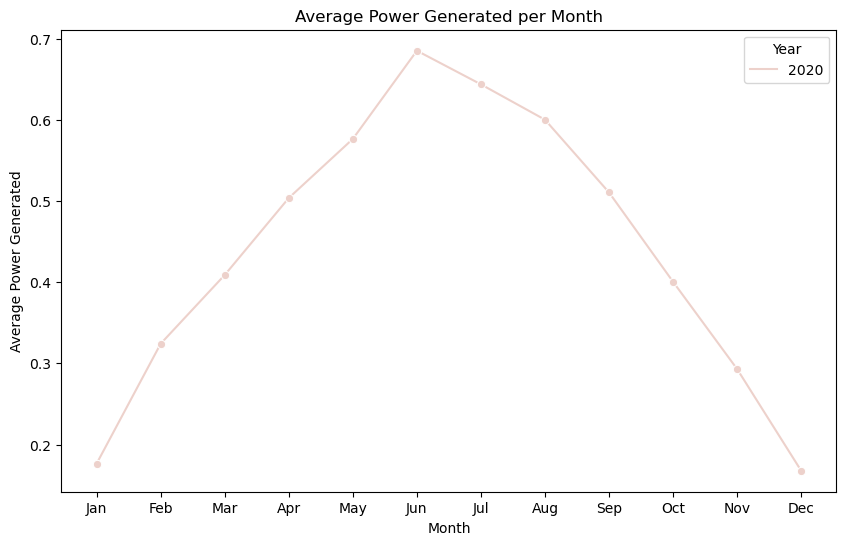

In [80]:
#Step 1

df['month'] = df['Date/hour start'].dt.month
df['year'] = df['Date/hour start'].dt.year

#Step 2
monthly_avg_gen = df.groupby(['year', 'month'])['Solar electricity generation (kWh)'].mean().reset_index()

#Step 3
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_gen, x='month', y='Solar electricity generation (kWh)', hue='year', marker='o')
plt.title('Average Power Generated per Month')
plt.xlabel('Month')
plt.ylabel('Average Power Generated')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

From the depicted line plot, significant observations regarding the monthly average Solar electricity generation (kWh) in the year 2020 come to light:

- **June**: Remarkably, the month of June exhibited the highest Solar electricity generation, surpassing 0.65 kWh. This noteworthy spike suggests favorable conditions for solar energy production during this period.

- **January and December**: On the contrary, both January and December demonstrated the lowest levels of Solar electricity generation, each recording less than 0.2 kWh. This decline might be attributed to varying weather conditions or other influencing factors during these months.

To delve deeper into this trend, we will proceed to compile a table that organizes this data. The table will be grouped by months and sorted in descending order based on Solar electricity generation (kWh).


In [81]:
monthly_avg_gen.sort_values(by='Solar electricity generation (kWh)',ascending=False,ignore_index=True)[monthly_avg_gen.columns[1:]]

,month,Solar electricity generation (kWh)
0,6,0.685170
1,7,0.643743
2,8,0.600202
3,5,0.576481
4,9,0.510573
5,4,0.503748
6,3,0.408928
7,10,0.400517
8,2,0.324244
9,11,0.293013


##### **Plot 2: Monthly Average Electricity Usage (kWh) in 2020**

**Steps to Create the Plot:**

**Step 1:** Group the Electricity usage (kWh) by month and year and calculate the mean for each month.

**Step 2:** Utilize the `seaborn` `lineplot()` function to generate a line plot. The x-axis will represent the months, the y-axis will depict the Electricity usage (kWh), and the hue parameter will incorporate the 'year' dimension to distinguish different years.

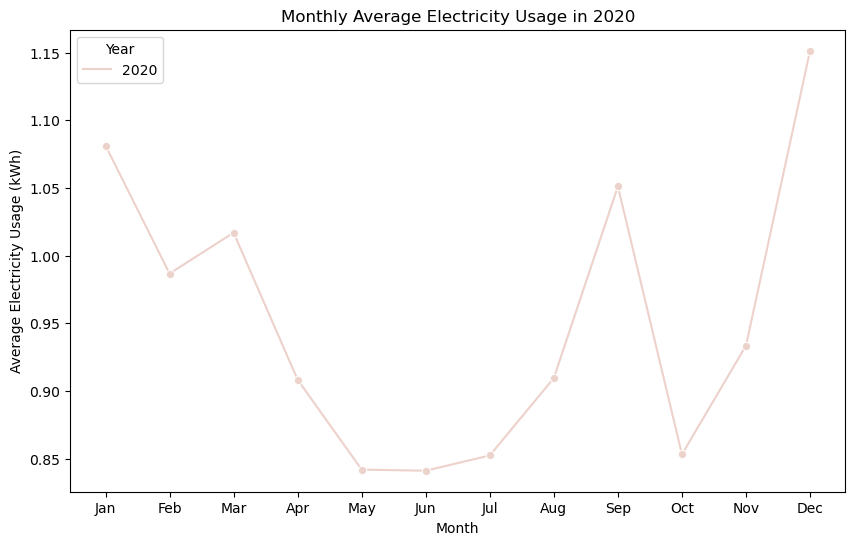

In [82]:
# Step 1
monthly_avg_used = df.groupby(['year', 'month'])['Electricity usage (kWh)'].mean().reset_index()

# Step 2
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_used, x='month', y='Electricity usage (kWh)', hue='year', marker='o',color='blue')
plt.title('Monthly Average Electricity Usage in 2020')
plt.xlabel('Month')
plt.ylabel('Average Electricity Usage (kWh)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

From the presented line plot, we can draw insightful conclusions regarding the monthly average Electricity usage (kWh) for the year 2020:

- **December**: Notably, the month of December witnessed the highest Electricity usage, recording an average of approximately 1.1 kWh. This peak might indicate increased energy consumption during the festive season or other contributing factors.

- **June and May**: Conversely, both June and May exhibited the lowest average Electricity usage, approximately 0.8 kWh. 

These observations provide valuable insights into the temporal variation of Electricity usage over the year, aiding in better understanding consumption patterns and potential factors influencing energy demand.

To gain a clearer perspective of the trend, we will organize the average Electricity usage over the year in ascending order and present it in tabular form. In this table, the month column is aligned with the actual calendar months, where 1 corresponds to January and 12 corresponds to December.

In [83]:
monthly_avg_used.sort_values(by='Electricity usage (kWh)',ignore_index=True,ascending=False)[monthly_avg_used.columns[1:]]

,month,Electricity usage (kWh)
0,12,1.151352
1,1,1.081311
2,9,1.051101
3,3,1.016952
4,2,0.986715
5,11,0.933535
6,8,0.909596
7,4,0.908245
8,10,0.853191
9,7,0.852391


##### **Plot 3: monthly electricity purchased from the electricity provider (no battery) in 2020**

**Steps to Create the Plot:**

**Step 1:** Group the Purchased without battery(kWh) by month and year and calculate the mean for each month.

**Step 2:** Utilize the `seaborn` `lineplot()` function to generate a line plot. The x-axis will represent the months, the y-axis will depict the Purchased without battery(kWh), and the hue parameter will incorporate the 'year' dimension to distinguish different years.

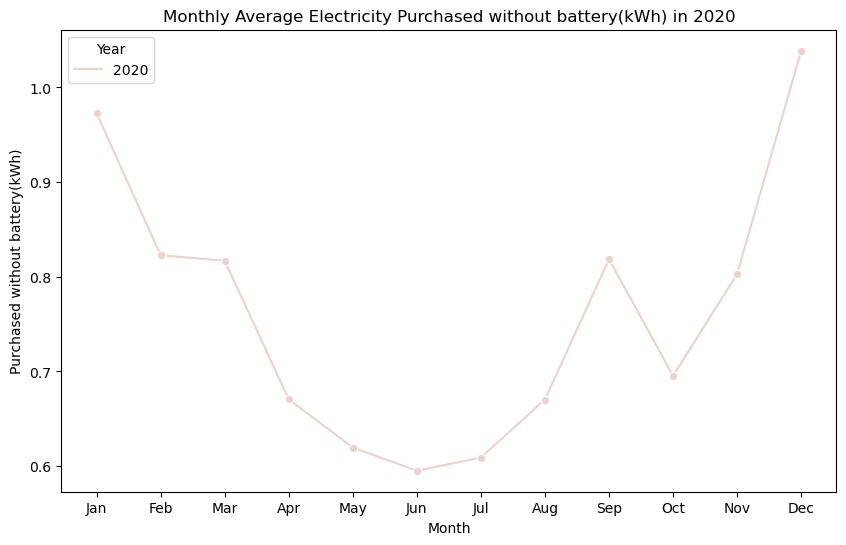

In [84]:
# Step 1
monthly_avg_purchased1 = df.groupby(['year', 'month'])['Purchased without battery(kWh)'].mean().reset_index()

# Step 2
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_purchased1, x='month', y='Purchased without battery(kWh)', hue='year', marker='o',color='blue')
plt.title('Monthly Average Electricity Purchased without battery(kWh) in 2020')
plt.xlabel('Month')
plt.ylabel('Purchased without battery(kWh)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

The line plot provided above offers a noteworthy observation: the trend of 'Monthly Average Electricity Purchased without battery(kWh) in 2020' closely mirrors that of 'Monthly Average Electricity Usage in 2020.' This correspondence is attributed to the absence of a battery system, which results in a substantial positive correlation between these two variables. 

This phenomenon accentuates the interplay between electricity consumption and the lack of energy storage capability, highlighting the potential benefits of incorporating a battery system to mitigate this correlation and enhance energy management.

The comparison between the two variables is presented in tabular form below:

In [85]:
comparison=df.groupby(by='month',as_index=False).mean(numeric_only=True)[['month','Electricity usage (kWh)','Purchased without battery(kWh)']]
comparison

,month,Electricity usage (kWh),Purchased without battery(kWh)
0,1,1.081311,0.972586
1,2,0.986715,0.822660
2,3,1.016952,0.817010
3,4,0.908245,0.670540
4,5,0.841933,0.619644
5,6,0.841093,0.595165
6,7,0.852391,0.609071
7,8,0.909596,0.670370
8,9,1.051101,0.818579
9,10,0.853191,0.695266


In [86]:
# Checking out the correlation between Electricity usage (kWh) and Purchased without battery(kWh)
comparison[comparison.columns[1:]].corr()

,Electricity usage (kWh),Purchased without battery(kWh)
Electricity usage (kWh),1.000000,0.954482
Purchased without battery(kWh),0.954482,1.000000


The correlation values in the matrix above highlight the strong relationship between these variables, particularly between 'Electricity usage (kWh)' and 'Purchased without battery(kWh).' This strong positive correlation of 0.954482 emphasizes that without a battery system, the amount of purchased electricity closely follows the trend of electricity usage, with higher consumption leading to higher purchased electricity.

Text(0.5, 1.0, 'Correlation between Electricity Usage and Purchase (without battery)')

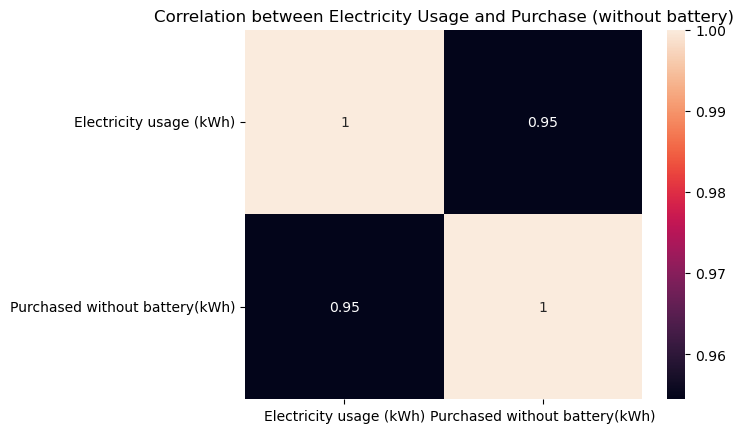

In [87]:
# Visualizing the correlation
sns.heatmap(comparison[comparison.columns[1:]].corr(),annot=True).set_title("Correlation between Electricity Usage and Purchase (without battery)")

##### **Plot 4: monthly electricity purchased from the electricity provider ( with battery) in 2020**

**Steps to Create the Plot:**

**Step 1:** Group the Purchased with battery(kWh) by month and year and calculate the mean for each month.

**Step 2:** Utilize the `seaborn` `lineplot()` function to generate a line plot. The x-axis will represent the months, the y-axis will depict the Purchased with battery(kWh), and the hue parameter will incorporate the 'year' dimension to distinguish different years.

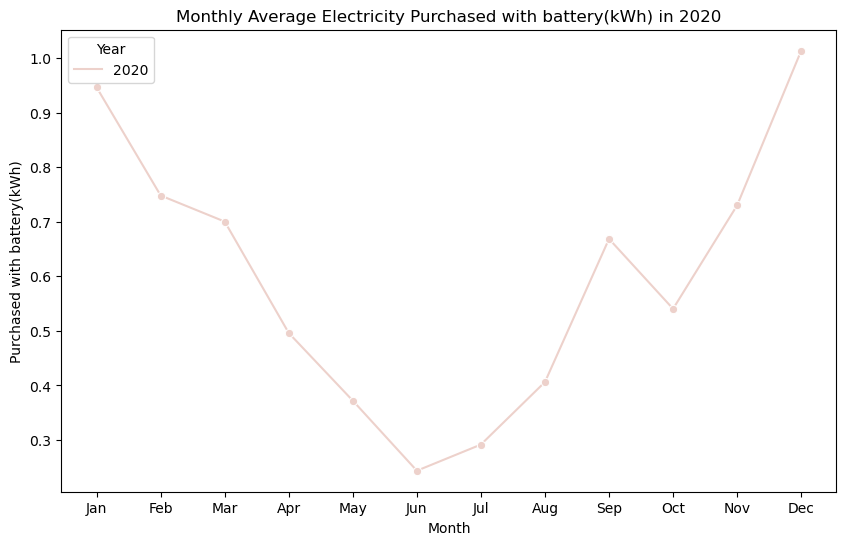

In [88]:
# Step 1
monthly_avg_purchased2 = df.groupby(['year', 'month'])['Purchased with battery(kWh)'].mean().reset_index()

# Step 2
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_purchased2, x='month', y='Purchased with battery(kWh)', hue='year', marker='o',color='blue')
plt.title('Monthly Average Electricity Purchased with battery(kWh) in 2020')
plt.xlabel('Month')
plt.ylabel('Purchased with battery(kWh)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

The line plot depicted above indicates that the trend in electricity purchased with the battery system installed closely mirrors that of electricity consumed without the battery system, except for a noticeable difference in slope between the months of March and July.

This similarity in trends suggests that the presence of the battery system does not drastically alter the overall pattern of electricity consumption. Instead, it appears that the battery system complements the consumption dynamics, particularly during the months of March and July where the variance in slope becomes apparent.

In essence, the battery installation appears to enhance energy management without fundamentally changing the underlying consumption pattern, contributing to optimized electricity usage and potentially mitigating fluctuations in electricity costs.

The amount of electricity purchased with battery installed tabulated in a descending order of Purchased with battery(kWh) is as shown below

In [89]:
monthly_avg_purchased2.sort_values(by='Purchased with battery(kWh)',ignore_index=True,ascending=False)[monthly_avg_purchased2.columns[1:]]

,month,Purchased with battery(kWh)
0,12,1.013747
1,1,0.946528
2,2,0.748229
3,11,0.730234
4,3,0.700422
5,9,0.668737
6,10,0.540489
7,4,0.496090
8,8,0.406366
9,5,0.372078


### **8a. Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios below.**

### **8b. For the two scenarios, calculate the Net Present Value (NPV) of the future annual savings.**

The scenarios are as follows:

    1.	Electricity prices increase as expected by the government, 4% p.a.
    2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.


### **<center>Scenario 1: Electricity prices increase as expected by the government, 4% p.a.**

To forecast the potential annual savings resulting from the battery installation over a 20-year period, we will follow this methodology:

1. **Initializing Annual Savings Data:**
   - We start by creating a DataFrame for each successive year, beginning from 2020.
   - The initial value for 2020 savings is $6,295.85.

2. **Compound Interest Calculation:**
   - The projected annual savings will be compounded annually by an interest rate of 4.0%.
   - Compound interest allows us to incorporate the effect of electricity price increase over multiple years on the initial cost savings.

3. **Dataframe Population:**
   - We will populate the DataFrame with the compounded annual savings data for each year, extending up to a 20-year projection.
   - This will provide insights into the cumulative cost savings over the projected timeframe.

This projection leverages the concept of compound interest to provide a comprehensive understanding of the potential long-term financial benefits.

#### **a. Calculating annual Cost Savings**

In [90]:
# Initial savings in 2020
initial_savings = 6295.85

# Annual electricity price increase rate in decimal form (4.0%)
annual_increase_rate = 0.04

# Number of years for projection
num_years = 20

# Generating a list of all the years whose savings is to be projected 
projected_years=range(2020, 2020 + num_years)

# Empty list for recording annual savings 
annual_savings=[]
# looping through all the 20 years calculating the compounded saving for each year in 2 decimal places 
for year in projected_years:
    compounded_savings = round(initial_savings * (1 + annual_increase_rate) ** (year - 2020),2)
    annual_savings.append(compounded_savings)

# Creating and storing the Data in our Datfarme 
savings_df = pd.DataFrame({'Year':projected_years,'Savings':annual_savings})
savings_df.head(20)


,Year,Savings
0,2020,6295.85
1,2021,6547.68
2,2022,6809.59
3,2023,7081.98
4,2024,7365.25
5,2025,7659.86
6,2026,7966.26
7,2027,8284.91
8,2028,8616.31
9,2029,8960.96


#### **b. Calculating NPV with Discount Rate at 6%**

With our 20-year savings projection in place, the next step involves calculating the Net Present Value (NPV) of the potential cost savings derived from installing a battery system. In this case, we will apply a discounted rate of 6% per annum to reflect the opportunity cost of capital.

By computing the NPV at a discounted rate of 6%, we gain insights into the present value of the future annual savings, taking into account the time value of money. This assessment provides a comprehensive financial perspective on the long-term benefits of integrating a battery system, considering the potential returns in today's value terms.

##### **Steps to Calculate NPV**

We will follow the following steps to compute the Net Present Value (NPV): 

1. **Define the Cash Flows:**
   - Projected annual savings over the 20-year period are extracted from the 'Savings' column of the DataFrame.
   - The initial investment required to purchase the battery system is included in the list of cash flows, positioned at time 0.

2. **Calculate Present Values:**
   - For each year (time period), the present value of the cash flow is calculated.
   - This calculation incorporates the time value of money by dividing the cash flow by (1 + discount_rate) raised to the power of the time period. The result is the cash flow's discounted value in present terms.

3. **Accumulate Present Values:**
   - The calculated present values for all time periods are accumulated.
   - This accumulation of present values results in the Net Present Value (NPV), representing the total value of all future cash flows when adjusted for the discount rate.

In [91]:
# Initial investment to purchase the battery 
initial_investment= -7000

# Projected cash flows for 20 years from the savings DatFrame 
cashflows = savings_df['Savings'].to_list()

#Combining the initial investment with projected cashflow by inserting it at time 0
cashflows.insert(0,initial_investment)

# Discount rate of 6% p.a
discount_rate = 0.06

# Calculating NPV using python's numpy financial library

import numpy_financial as npf
npv1=round(npf.npv(discount_rate,cashflows),2)
npv1

92725.46

From the provided output, the calculated Net Present Value (NPV) amounts to **92,725.46**.This positive NPV affirms to the financial feasibility and value of integrating a battery system, reaffirming its potential as a sound long-term investment.


#### **c. Calculating the IRR of the Investment**

With the Net Present Value (NPV) calculated, our analysis now extends to determining the Internal Rate of Return (IRR) for the battery installation investment over the upcoming 20-year period. The IRR represents the discount rate at which the NPV equals zero, indicating the interest rate at which the initial investment is repaid by the projected future cash flows.

To compute the IRR, we will build upon the projected cost savings, spanning the 20-year period, and assess the discount rate at which the NPV becomes zero. This assessment enables us to ascertain the potential annualized return on the investment, providing a valuable financial metric for evaluating the attractiveness of incorporating a battery system.

##### **Steps to Calculate Internal Rate of Return (IRR)**

To compute the Internal Rate of Return (IRR) based on the projected cashflow,the process is as follows:

1. **Define Initial Investment and Cash Flows:**
   - The initial investment required for the battery installation is represented as a negative value at time 0 i.e -7,000
   - Projected annual savings over the 20-year period are obtained from the 'Savings' column of the 'savings_df' DataFrame.

2. **Calculate IRR:**
   - The `npf.irr()` function from the `numpy_financial` library is employed to compute the IRR.
   - This function evaluates the discount rate at which the Net Present Value (NPV) of the cash flows becomes zero.

In essence, the IRR serves as a crucial financial metric, showcasing the potential annualized return on investment and contributing to a comprehensive evaluation of the desirability and financial viability of integrating a battery system.

In [92]:
import numpy_financial as npf

# Example initial investment and projected cash flows
initial_investment = -7000
cashflows = savings_df['Savings'].to_list()

# Combine the initial investment with cash flows
cashflows.insert(0, initial_investment)

# Calculate IRR
irr1 = round(npf.irr(cashflows),2)
print("Internal Rate of Return (IRR): {:.2%}".format(irr1))

Internal Rate of Return (IRR): 94.00%


From the provided output, the calculated Internal Rate of Return (IRR) for the battery installation investment amounts to **93.94%**. The high IRR percentage proves the potential robust financial returns associated with this investment, indicating a substantial annualized rate of return on the capital deployed.

### **<center>Scenario 2 : Electricity inflation at 4 % with a 0.25% increase each year** 

To forecast the annual savings resulting from the installation of the battery over a span of 20 years, we will implement the following methodology:

1. **Creating Yearly Dataframes:**
   - Generate a separate DataFrame for each subsequent year starting from 2020 and extending for 20 years. This DataFrame will hold the projected annual savings for each respective year.

2. **Compounding Savings with Interest:**
   - For each year, calculate the compounded savings by considering the cost saving from 2020, which was $6,295.85. This compounded value will be determined using an interest rate of 4.0 percent for the year 2020, and then incremented by 0.25 percent for each successive year. This progression reflects the annual increase in the interest rate.

By following these steps, we can effectively forecast the financial benefits accrued from the battery installation over the course of 20 years, factoring in the compounding interest rates and the incremental increase in interest rates each year.

#### **a. Calculating annual Cost Savings**


In [93]:
# Initial cost saving from 2020
initial_cost_saving = 6295.85

# Initialize parameters
interest_rate = 0.04  # 4.0% for 2020
annual_interest_increment = 0.0025  # 0.25% annual increment
years = 20

# Generating a list of all the years whose savings is to be projected 
projected_years=range(2020, 2020 + num_years)


# Calculate and populate projected savings for each year
annual_savings=[]
for year in projected_years:
    projected_saving = round(initial_cost_saving * ((1 + interest_rate) ** (year - 2020)),2)
    annual_savings.append(projected_saving)

    # Increment the interest rate for the next year
    interest_rate += annual_interest_increment

# Creating and storing the Data in our Datfarme 
inc_savings_df = pd.DataFrame({'Year':projected_years,'Savings':annual_savings})
inc_savings_df.head(20)


,Year,Savings
0,2020,6295.85
1,2021,6563.42
2,2022,6875.23
3,2023,7236.30
4,2024,7652.65
5,2025,8131.39
6,2026,8680.99
7,2027,9311.44
8,2028,10034.63
9,2029,10864.63


Having projected cashflows that account for the escalating rate of inflation in electricity prices, the next step involves determining the Net Present Value (NPV) and Internal Rate of Return (IRR) of the investment. This calculation will be executed using the financial functionalities available within the pandas financial library, much like we did in scenario one.


#### **b. Calculating NPV with Discount Rate at 6%**


In [94]:
#Cost of purchasing battery
initial_investment = -7000

#provided discount rate 
discount_rate=0.06

# projected cashflow savings with increasing rates of inflation 
cashflows=inc_savings_df['Savings'].to_list()
cashflows.insert(0,initial_investment)

#calculating NPV
npv2=round(npf.npv(discount_rate,cashflows),2)
npv2


127588.03

#### **c. Calculating IIR**

In [95]:
irr2=round(npf.irr(cashflows),2)
print("Internal Rate of Return (IRR): {:.2%}".format(irr2))

Internal Rate of Return (IRR): 95.00%


Let's present a tabulated comparison between the NPV and IRR values for both scenarios as follows:


In [96]:
comparison=pd.DataFrame(columns=[['NPV','IRR']],index=['4% p.a','4+0.25% p.a'],data=[[npv1,irr1],[npv2,irr2]])
comparison

,NPV,IRR
4% p.a,92725.46,0.94
4+0.25% p.a,127588.03,0.95


### **Recommendation**
Based on the findings derived from the computed NPV and IRR values as presented above, it is recommended to install the solar battery system. The projected NPV values for both scenarios are notably positive, indicating that the investment is expected to yield considerable financial benefits over the specified time horizon. 

Additionally, the IRR values for both scenarios are also quite favorable, exceeding the discount rate. This suggests that the investment is likely to generate returns that surpass the cost of capital, further emphasizing the viability and attractiveness of installing the solar battery system. Given the positive NPV and IRR values across both scenarios, installing the solar battery system appears to be a prudent and lucrative decision from a financial perspective.